In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction import FeatureHasher

# Common imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import umap
import umap.plot

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
# Splitting the data
# mndata = MNIST('fashion-mnist/data/fashion')
# Get data from csv
DATA_DIR =  "./datasets/unsw/"
testing_fname = "UNSW_NB15_testing-set.csv"
training_fname = "UNSW_NB15_training-set.csv"

df1 = pd.read_csv(DATA_DIR + training_fname)
df2 =  pd.read_csv(DATA_DIR  + testing_fname)
df = df1.append(df2)

from sklearn.model_selection import train_test_split
y = df['label'].tolist()
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

label_column = ['label']
categorical_columns = ['proto', 'service', 'state']
drop_columns = ['id', 'sttl', 'dttl', 'swin', 'dwin', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']
numeric_columns = list(set(df.columns) - set(label_column) - set(categorical_columns) - set(drop_columns))

scaler = sklearn.preprocessing.MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.fit_transform(X_test[numeric_columns])

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('hash_proto', 'drop', 'proto'),
                      ('hash_service', 'drop', 'service'),
                      ('hash_state', 'drop', 'state'),
                      ('numeric_cols', 'passthrough', numeric_columns),
                       ('dropped', 'drop', drop_columns),
                       ('label_drop', 'drop', 'label')])

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

<ipython-input-2-76d9cd123fae>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
/home/ubuntu/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-2-76d9cd123fae>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [11]:
type(X_train)

numpy.ndarray

In [12]:
X_train.shape

(193254, 21)

In [13]:
X_train = X_train[:-189900, :]
y_train = y_train[:-189900]

In [6]:
# Running the embedding
import umap
embedding = umap.UMAP(n_neighbors=30).fit_transform(X_train)

In [7]:
type(embedding)

numpy.ndarray

In [ ]:
p = umap.plot.interactive(embedding, point_size=2)
umap.plot.show(p)

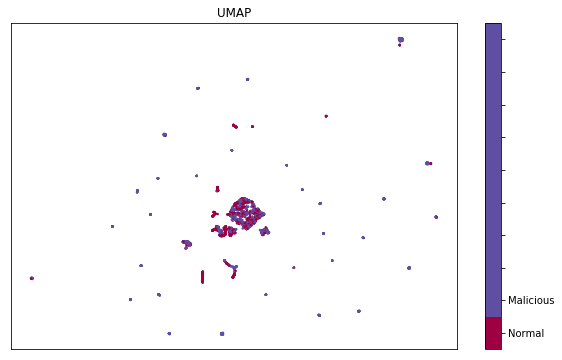

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.scatter(*embedding.T, s=2, c=np.array(y_train), cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(6)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(['Normal', 'Malicious'])
plt.title('UMAP');

In [3]:
import sklearn.datasets

In [4]:
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [5]:
mapper = umap.UMAP().fit(fmnist.data[:3000])

In [6]:
hover_data = pd.DataFrame({'index':np.arange(3000),
                           'label':fmnist.target[:3000]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

In [7]:
umap.plot.output_notebook()

Loading BokehJS ...

In [9]:
p = umap.plot.interactive(mapper, labels=fmnist.target[:3000], hover_data=hover_data, point_size=2)
umap.plot.show(p)


In [10]:
type(mapper)

umap.umap_.UMAP

In [14]:
embedding = umap.UMAP(n_neighbors=30).fit(X_train)

In [15]:
type(embedding)

umap.umap_.UMAP

In [26]:
hover_data2 = pd.DataFrame({'index':np.arange(3354),
                           'label':y_train})
hover_data2['type'] = hover_data.label.map(
    {
        '0':'Normal',
        '1':'Attack'
    }
)

In [27]:
p = umap.plot.interactive(embedding, labels=y_train, hover_data=hover_data2, point_size=4)
umap.plot.show(p)

In [24]:
hover_data2

,index,label
0,0,NaN
1,1,Normal
2,2,Normal
3,3,NaN
4,4,Normal
...,...,...
3349,3349,NaN
3350,3350,NaN
3351,3351,NaN
3352,3352,NaN


In [25]:
y_train

[1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
